In [1]:
from google.colab import files
files.upload()

Saving Mall_Customers_2.csv to Mall_Customers_2.csv
Saving Social_Network_Ads_2.csv to Social_Network_Ads_2.csv


{'Mall_Customers_2.csv': b'CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)\n1,Male,19,15,39\n2,Male,21,15,81\n3,Female,20,16,6\n4,Female,23,16,77\n5,Female,31,17,40\n6,Female,22,17,76\n7,Female,35,18,6\n8,Female,23,18,94\n9,Male,64,19,3\n10,Female,30,19,72\n11,Male,67,19,14\n12,Female,35,19,99\n13,Female,58,20,15\n14,Female,24,20,77\n15,Male,37,20,13\n16,Male,22,20,79\n17,Female,35,21,35\n18,Male,20,21,66\n19,Male,52,23,29\n20,Female,35,23,98\n21,Male,35,24,35\n22,Male,,24,73\n23,Female,46,25,5\n24,Male,31,25,73\n25,Female,54,28,14\n26,Male,29,28,82\n27,Female,45,28,32\n28,Male,35,28,61\n29,Female,40,29,31\n30,Female,23,29,87\n31,Male,60,30,4\n32,Female,21,30,73\n33,Male,53,33,4\n34,Male,18,33,92\n35,Female,49,33,14\n36,Female,21,33,81\n37,Female,42,34,17\n38,Female,30,34,73\n39,Female,36,37,26\n40,Female,20,37,75\n41,Female,65,38,35\n42,Male,24,38,92\n43,Male,48,39,36\n44,Female,31,39,61\n45,Female,49,39,28\n46,Female,24,39,65\n47,Female,50,40,55\n48,Female,27,40,47\n49

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Bài 1

In [3]:
df = pd.read_csv('Mall_Customers_2.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15,39.0
1,2,Male,21.0,15,81.0
2,3,Female,20.0,16,6.0
3,4,Female,23.0,16,77.0
4,5,Female,31.0,17,40.0
...,...,...,...,...,...
195,196,Female,35.0,120,79.0
196,197,Female,45.0,126,28.0
197,198,Male,32.0,126,74.0
198,199,Male,32.0,137,18.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   200 non-null    object 
 2   Age                     195 non-null    float64
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  197 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [5]:
#sao chép dữ liệu từ dataframe
df1 = df.copy()

In [9]:
#điền dữ liệu bị thiếu
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
df1[['Age']] = imp.fit_transform(df1[['Age']])
df1[['Spending Score (1-100)']] = imp.fit_transform(df1[['Spending Score (1-100)']])

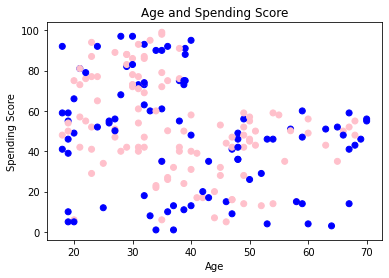

In [14]:
#Vẽ biểu đồ scatter theo tuổi và chi tiêu
col = np.array(['blue' if GT == 'Male' else 'pink' for GT in df1['Genre']])
plt.scatter(df1['Age'].values, df1['Spending Score (1-100)'].values, c=col)
plt.title('Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

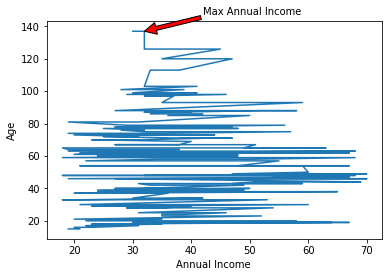

In [19]:
#Vẽ biểu đồ đường thể hiện của độ tuổi và thu nhập hàng năm
Age = df1['Age']
Inc = df1['Annual Income (k$)']

plt.plot(Age, Inc)
plt.xlabel('Annual Income ')
plt.ylabel('Age')

id_max = Inc.argmax()
plt.annotate('Max Annual Income', xy =(Age[id_max], Inc[id_max]), xytext = (Age[id_max]+10, Inc[id_max]+10),  arrowprops=dict(facecolor="red"))

plt.show()


# Bài 2

In [20]:
file = pd.read_csv('Social_Network_Ads_2.csv')
file

,Age,EstimatedSalary,Purchased
0,19,19000.0,0.0
1,35,20000.0,0.0
2,26,43000.0,0.0
3,27,57000.0,0.0
4,19,76000.0,0.0
...,...,...,...
395,46,41000.0,1.0
396,51,23000.0,1.0
397,50,20000.0,1.0
398,36,33000.0,0.0


In [21]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              400 non-null    int64  
 1   EstimatedSalary  397 non-null    float64
 2   Purchased        398 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [25]:
#Sử lý dữ liệu bị thiếu
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
file.iloc[:, 1:3] = imp.fit_transform(file.iloc[:, 1:3])


In [26]:
#thay thế các giá trị 0.0 thành "Chưa mua",1.0 thành "Đã mua"
file['Purchased'].replace(1.0, 'Đã mua', inplace = True)
file['Purchased'].replace(0.0, 'Chưa mua', inplace = True)

#đặt lại tên cột
file = file.rename(columns = {'Purchased': 'Status'})
file

,Age,EstimatedSalary,Status
0,19,19000.0,Chưa mua
1,35,20000.0,Chưa mua
2,26,43000.0,Chưa mua
3,27,57000.0,Chưa mua
4,19,76000.0,Chưa mua
...,...,...,...
395,46,41000.0,Đã mua
396,51,23000.0,Đã mua
397,50,20000.0,Đã mua
398,36,33000.0,Chưa mua


In [28]:
age = file['Age']
status = file['Status']
salary = file['EstimatedSalary']

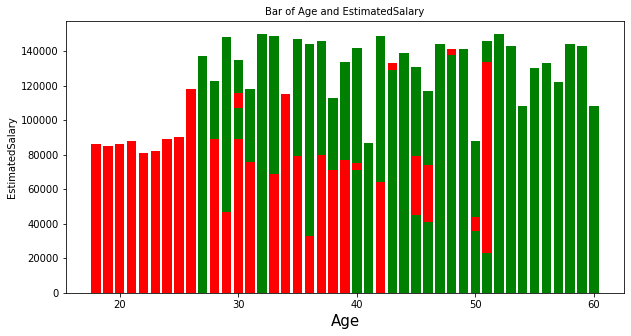

In [38]:
color = ['red' if stt == 'Chưa mua' else 'green' for stt in status]

plt.figure(figsize=(10,5))

#vẽ biểu đồ cột
for i in range(len(color)) :
    plt.bar(age[i], salary[i], color = color[i])

plt.title('Bar of Age and EstimatedSalary',fontdict={'fontsize' : '10'})
plt.xlabel("Age",fontdict={'fontsize' : '15'})
plt.ylabel("EstimatedSalary",fontdict={'fontsize' : '10'})
plt.show()

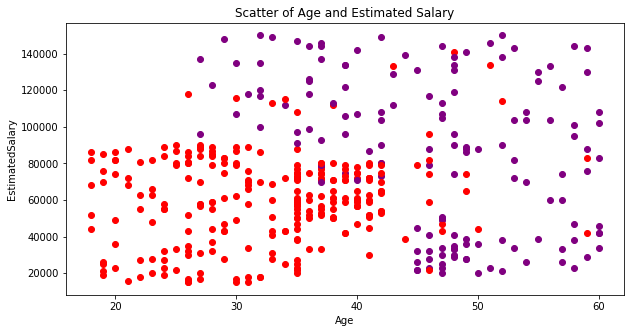

In [39]:

clr = ['purple' if stt == 'Đã mua' else 'red' for stt in status]

#vẽ biểu đồ scatter
plt.figure(figsize=(10,5))
for i in range(len(clr)):
      plt.scatter(age[i], salary[i], c = clr[i])


plt.title('Scatter of Age and Estimated Salary')
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.show()